**Importing fastbook and its setups**

In [4]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


**Loading Grizzly bear picture**

In [5]:
from fastbook import *
urls = search_images_ddg('grizzly bear', max_images=150)
len(urls),urls[0]

(150,
 'http://www.tweedsmuirparklodge.com/assets/Uploads/_resampled/ScaleWidthWzEyMDBd/Grizzly-bear-with-fish-at-Tweedsmuir.jpg')

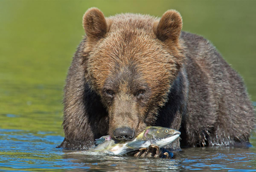

In [6]:
dest = 'images/bear.jpg'
download_url(urls[0], dest)

im = Image.open(dest)
im.thumbnail((256,256))
im

**Saving all the pics in different categories ie bear_types**

In [7]:
path = Path('bears')
path.mkdir(exist_ok=True)

bear_types = 'grizzly','black','teddy'

for e in bear_types:
  dest = path/e
  dest.mkdir(exist_ok=True)
  bear_images_urls = search_images_ddg(f'{e} bear')
  download_images(dest, urls = bear_images_urls)

fns = get_image_files(path)
fns


(#572) [Path('bears/grizzly/00000053.jpg'),Path('bears/grizzly/00000043.jpg'),Path('bears/grizzly/00000123.jpg'),Path('bears/grizzly/00000013.jpg'),Path('bears/grizzly/00000074.jpg'),Path('bears/grizzly/00000025.jpg'),Path('bears/grizzly/00000066.jpg'),Path('bears/grizzly/00000196.jpg'),Path('bears/grizzly/00000191.jpg'),Path('bears/grizzly/00000173.jpg')...]

**Acessiing and deleting the saved pics**

In [8]:
failed = verify_images(fns)
failed

(#3) [Path('bears/grizzly/00000110.jpg'),Path('bears/teddy/00000167.png'),Path('bears/black/00000044.jpg')]

In [9]:
failed.map(Path.unlink);

###**Setting up with data loaders**
we have the ImageBlock being the indedependent variable and the dependent variable beng the CategoryBlock
and also the *validation percentage set is 0.2*

In [10]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [11]:
dls = bears.dataloaders(path)

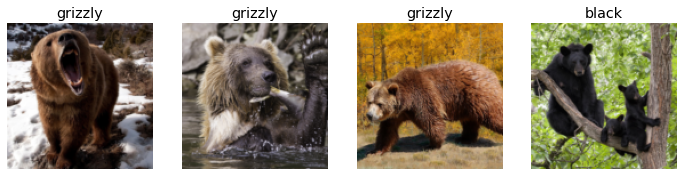

In [12]:
dls.valid.show_batch(max_n=4, nrows=1)

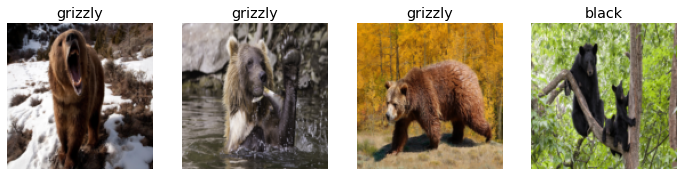

In [13]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

###Training my model_bear classiffier (And using it to train our model)

In [15]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

###Create our learner and fine tune(CNN learner)

In [16]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


###Comfusion matrix

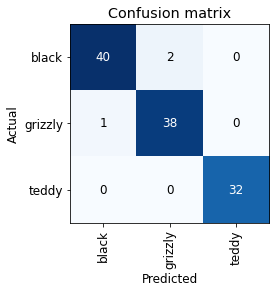

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Top losses(Predict-Actual-loss-Probality)

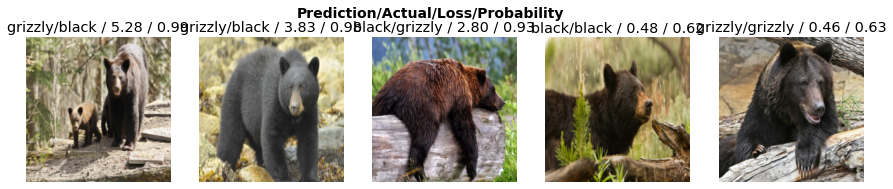

In [20]:
interp.plot_top_losses(5, nrows=1)

**Installing fast AI and useful libraries**

In [22]:
!pip install fastai

In [25]:
from fastai.vision.widgets import *

In [26]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


###**Predicting and deploying**

**Turning Your Model into an Online Application**


### Using the Model for Inference

In [27]:
learn.export()

In [28]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [29]:
learn_inf = load_learner(path/'export.pkl')

###predicting if the category of an animal in a pic

In [30]:
learn_inf.predict('/content/71qVVUAINNL._AC_SL1000_.jpg')

('teddy', TensorBase(2), TensorBase([2.2119e-09, 1.8559e-09, 1.0000e+00]))

**Our targets which will always be predicted*

In [31]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']